<a href="https://colab.research.google.com/github/Poorya0071/-Natural-Disasters-Tweets-with-NLP/blob/main/NLP_Multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook aims to classify multiclass texts.

In [1]:
import os
import pandas as pd

Upload the data.

In [2]:

!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [3]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [4]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [5]:
for file_name in os.listdir(data_dir):
  print(data_dir + file_name)

pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt
pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt
pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt


read lines of the train, valid, and test datasets

In [6]:
with open('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt', 'r') as f:
  train_lines = f.readlines()

In [7]:
with open('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt', 'r') as f:
  test_lines = f.readlines()

In [8]:
with open('pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt', 'r') as f:
  valid_lines = f.readlines()

In [9]:
len(train_lines), len(test_lines), len(valid_lines)

(210040, 35135, 35212)

In [10]:
train_lines[1]

'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n'

splits datasets to text and lables.

In [89]:
train_split_ls_text = []
train_label_ls = []
for i in range(len(train_lines)):
  if '\t' in train_lines[i]:
    train_label, train_split_text = train_lines[i].split('\t')
    train_split_ls_text.append(train_split_text)
    train_label_ls.append(train_label)

print(train_label_ls[:5])
print(train_split_ls_text[:5])

['OBJECTIVE', 'METHODS', 'METHODS', 'METHODS', 'METHODS']
['To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n', 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n', 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n', 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .\n', 'Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n']


In [90]:
len(train_split_ls_text), len(train_label_ls)

(180040, 180040)

In [91]:
train_dataframe = pd.DataFrame()
train_dataframe['train_text']= train_split_ls_text
train_dataframe['train_label']= train_label_ls
train_dataframe.head()

,train_text,train_label
0,To investigate the efficacy of @ weeks of dail...,OBJECTIVE
1,A total of @ patients with primary knee OA wer...,METHODS
2,Outcome measures included pain reduction and i...,METHODS
3,Pain was assessed using the visual analog pain...,METHODS
4,Secondary outcome measures included the Wester...,METHODS


In [92]:
test_split_ls_text = []
test_label_ls = []
for i in range(len(test_lines)):
  if '\t' in test_lines[i]:
    test_label, test_split_text = test_lines[i].split('\t')
    test_split_ls_text.append(test_split_text)
    test_label_ls.append(test_label)

print(test_label_ls[:5])
print(test_split_ls_text[:5])

['BACKGROUND', 'RESULTS', 'RESULTS', 'RESULTS', 'RESULTS']
['This study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .\n', 'A post hoc analysis was conducted with the use of data from the Evaluation Study of Congestive Heart Failure and Pulmonary Artery Catheterization Effectiveness ( ESCAPE ) .\n', 'Liver function tests ( LFTs ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .\n', 'Survival analyses were used to assess the association between admission Model of End-Stage Liver Disease Excluding International Normalized Ratio ( MELD-XI ) scores and patient outcome.There was a high prevalence of abnormal baseline ( admission ) LFTs ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) .\n', "The percentage of patients with abnormal LFTs decreased significantly from baseline to @-months ' follow-up .\n"]


In [93]:
len(test_split_ls_text), len(test_label_ls)

(30135, 30135)

In [94]:
test_dataframe = pd.DataFrame()
test_dataframe['test_text']= test_split_ls_text
test_dataframe['test_label']= test_label_ls
test_dataframe.head()

,test_text,test_label
0,This study analyzed liver function abnormaliti...,BACKGROUND
1,A post hoc analysis was conducted with the use...,RESULTS
2,Liver function tests ( LFTs ) were measured at...,RESULTS
3,Survival analyses were used to assess the asso...,RESULTS
4,The percentage of patients with abnormal LFTs ...,RESULTS


In [95]:
valid_split_ls_text = []
valid_label_ls = []
for i in range(len(valid_lines)):
  if '\t' in valid_lines[i]:
    valid_label, valid_split_text = valid_lines[i].split('\t')
    valid_split_ls_text.append(valid_split_text)
    valid_label_ls.append(valid_label)

print(valid_label_ls[:5])
print(valid_split_ls_text[:5])

['BACKGROUND', 'BACKGROUND', 'OBJECTIVE', 'METHODS', 'METHODS']
['IgE sensitization to Aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma .\n', 'It is not clear whether these patients would benefit from antifungal treatment .\n', 'We sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are IgE sensitized to A fumigatus .\n', 'Asthmatic patients who were IgE sensitized to A fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , randomized design .\n', 'Primary outcomes were improvement in quality of life at the end of the treatment period and a reduction in the number of severe exacerbations over the @ months of the study .\n']


In [96]:
valid_dataframe = pd.DataFrame()
valid_dataframe['valid_text']= valid_split_ls_text
valid_dataframe['valid_label']= valid_label_ls
valid_dataframe.head()

,valid_text,valid_label
0,IgE sensitization to Aspergillus fumigatus and...,BACKGROUND
1,It is not clear whether these patients would b...,BACKGROUND
2,We sought to determine whether a @-month cours...,OBJECTIVE
3,Asthmatic patients who were IgE sensitized to ...,METHODS
4,Primary outcomes were improvement in quality o...,METHODS


shuffle all datasets.

In [97]:
train_df_shuffeled = train_dataframe.sample(frac=1, random_state=42).reset_index()
valid_df_shuffeled = valid_dataframe.sample(frac=1, random_state=42).reset_index()
test_df_shuffeled = test_dataframe.sample(frac=1, random_state=42).reset_index()
train_df_shuffeled.head(10)

,index,train_text,train_label
0,103855,A multivariate model containing CADEES items a...,RESULTS
1,161039,The effect evaluation will focus on performanc...,METHODS
2,35,Hands-on practice is key .\n,CONCLUSIONS
3,55599,The present study examines the linkages across...,BACKGROUND
4,83622,Douching with lactated Ringer 's solution afte...,CONCLUSIONS
5,106146,@ ; @:@ -@ ) .\n,BACKGROUND
6,44061,Telemedicine increased the percentage of diabe...,CONCLUSIONS
7,140040,Application of GCI in the pelvic cavity after ...,CONCLUSIONS
8,43462,Twenty-two subjects with type @ diabetes were ...,METHODS
9,52694,The percentage of time in the therapeutic INR ...,RESULTS


remove the old indexes.

In [98]:
train_df_shuffeled = train_df_shuffeled.drop(['index'], axis=1)
valid_df_shuffeled = valid_df_shuffeled.drop(['index'], axis=1)
test_df_shuffeled = test_df_shuffeled.drop(['index'], axis=1)

In [99]:
train_df_shuffeled.head()

,train_text,train_label
0,A multivariate model containing CADEES items a...,RESULTS
1,The effect evaluation will focus on performanc...,METHODS
2,Hands-on practice is key .\n,CONCLUSIONS
3,The present study examines the linkages across...,BACKGROUND
4,Douching with lactated Ringer 's solution afte...,CONCLUSIONS


In [100]:
train_df_shuffeled['train_label'].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: train_label, dtype: int64

Use OneHotEncoder to convert text lables to numbers.

In [101]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df_shuffeled['train_label'].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(valid_df_shuffeled["valid_label"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df_shuffeled["test_label"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

Encode labeles for sklearn base_models.

In [102]:

# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df_shuffeled['train_label'].to_numpy())
val_labels_encoded = label_encoder.transform(valid_df_shuffeled["valid_label"].to_numpy())
test_labels_encoded = label_encoder.transform(test_df_shuffeled["test_label"].to_numpy())

# Check what training labels look like
train_labels_encoded

array([4, 2, 1, ..., 4, 2, 2])

In [103]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

conver the train and valid sets to list.

In [104]:
train_X = train_df_shuffeled['train_text'].tolist()
valid_X = valid_df_shuffeled['valid_text'].tolist()

Create the base model

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(train_X, 
            train_labels_encoded);

In [106]:
model_0.score(train_X, train_labels_encoded)

0.7516829593423684

evaluate the base model on validation dataset.

In [202]:
model_0_eval = model_0.score(valid_X, val_labels_encoded)
model_0_eval

0.7218323844829869

TextVectorization to prepare the data for deep learning models

In [108]:
# How many words are in our vocabulary? (taken from 3.2 in https://arxiv.org/pdf/1710.06071.pdf)
max_tokens = 68000
output_sequence_length=55

In [109]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens= max_tokens, 
                                    standardize="lower_and_strip_punctuation", 
                                    split="whitespace",
                                    ngrams=None, 
                                    output_mode="int", 
                                    output_sequence_length=55)


In [110]:
text_vectorizer.adapt(train_X)

In [111]:
sample_sentence= "these days inflation rate is goinig up and up, then the us government needs to increase the interest rate to fight against the inflation."
text_vectorizer(sample_sentence)

<tf.Tensor: shape=(55,), dtype=int64, numpy=
array([  111,    84,  8253,    78,    20,     1,   303,     3,   303,
         516,     2,   850,  5207,  1524,     6,   179,     2,  1511,
          78,     6, 31302,   644,     2,  8253,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])>

In [112]:
input_len = len(text_vectorizer.get_vocabulary())

use the embedding model.

In [113]:
tf.random.set_seed(42)

embedding = tf.keras.layers.Embedding(input_dim= input_len, # length of vocabulary
                               output_dim=128, 
                               mask_zero=True,
                               name="token_embedding")

embedding

In [114]:
embedding(text_vectorizer(sample_sentence))

<tf.Tensor: shape=(55, 128), dtype=float32, numpy=
array([[ 0.02442567,  0.00734949, -0.00630622, ..., -0.01308938,
         0.01197132, -0.04500763],
       [ 0.00518262, -0.04472364, -0.04741461, ...,  0.01816589,
        -0.04061639, -0.00980747],
       [ 0.01235603,  0.01323694,  0.04364059, ..., -0.02180973,
         0.001171  ,  0.00774747],
       ...,
       [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
         0.00912381, -0.00024097],
       [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
         0.00912381, -0.00024097],
       [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
         0.00912381, -0.00024097]], dtype=float32)>

prepare the data by slicing and prefetch to increase the speed of deep learning models.

In [115]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((valid_X, val_labels_one_hot))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [116]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [117]:
from tensorflow.keras import layers

a simple Conv1D model.

In [118]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = embedding(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(5, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 55)               0         
 ectorization)                                                   
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d_1 (Conv1D)           (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_5 (Dense)             (None, 5)                 325 

In [203]:
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=10,
                              validation_data= valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))
                              
                              )

Epoch 1/10
562/562 [==============================] - 6s 10ms/step - loss: 0.7678 - accuracy: 0.7653 - val_loss: 0.6147 - val_accuracy: 0.7866
Epoch 2/10
562/562 [==============================] - 5s 9ms/step - loss: 0.5200 - accuracy: 0.8158 - val_loss: 0.5834 - val_accuracy: 0.7979
Epoch 3/10
562/562 [==============================] - 5s 8ms/step - loss: 0.4844 - accuracy: 0.8308 - val_loss: 0.5732 - val_accuracy: 0.8009
Epoch 4/10
562/562 [==============================] - 5s 8ms/step - loss: 0.4766 - accuracy: 0.8355 - val_loss: 0.5740 - val_accuracy: 0.7942
Epoch 5/10
562/562 [==============================] - 5s 8ms/step - loss: 0.4765 - accuracy: 0.8371 - val_loss: 0.5456 - val_accuracy: 0.8012
Epoch 6/10
562/562 [==============================] - 6s 10ms/step - loss: 0.4614 - accuracy: 0.8422 - val_loss: 0.5525 - val_accuracy: 0.7995
Epoch 7/10
562/562 [==============================] - 5s 8ms/step - loss: 0.4588 - accuracy: 0.8410 - val_loss: 0.5417 - val_accuracy: 0.8105
Epoc

In [204]:
model_1_eval = model_1.evaluate(valid_dataset)
model_1_eval

945/945 [==============================] - 4s 5ms/step - loss: 0.5494 - accuracy: 0.8061


[0.5493935346603394, 0.806103527545929]

In [120]:
pd.DataFrame(model_1_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.912020,0.638345,0.657106,0.750997
1,0.642756,0.763846,0.601742,0.780253
2,0.604077,0.783363,0.581113,0.791223
3,0.596150,0.786421,0.576610,0.797540
4,0.587293,0.791314,0.554725,0.800199
5,0.565137,0.798154,0.543668,0.805851
6,0.556200,0.802880,0.534491,0.806516
7,0.548788,0.807329,0.525903,0.811835
8,0.540953,0.808719,0.519208,0.807846
9,0.525980,0.813112,0.516304,0.813830


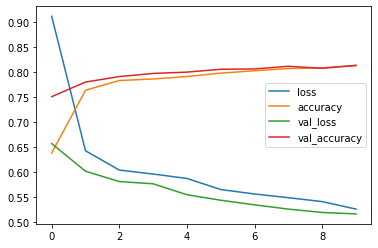

In [123]:
pd.DataFrame(model_1_history.history).plot()

A deep Conv1D model.

In [129]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = embedding(text_vectors) # create embedding
x = layers.Conv1D(1024, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.Conv1D(512, kernel_size=5, padding="same", activation="relu")(x)
x = layers.Conv1D(256, kernel_size=5, padding="same", activation="relu")(x)
x = layers.Conv1D(128, kernel_size=5, padding="same", activation="relu")(x)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(5, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 55)               0         
 ectorization)                                                   
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 conv1d_10 (Conv1D)          (None, 55, 1024)          656384    
                                                                 
 conv1d_11 (Conv1D)          (None, 55, 512)           2621952   
                                                                 
 conv1d_12 (Conv1D)          (None, 55, 256)           655616    
                                                           

In [205]:
model_2_history = model_2.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=10,
                              validation_data= valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))
                              
                              )

Epoch 1/10
562/562 [==============================] - 14s 25ms/step - loss: 0.6398 - accuracy: 0.7760 - val_loss: 0.5835 - val_accuracy: 0.7859
Epoch 2/10
562/562 [==============================] - 13s 22ms/step - loss: 0.4767 - accuracy: 0.8309 - val_loss: 0.5340 - val_accuracy: 0.8128
Epoch 3/10
562/562 [==============================] - 13s 22ms/step - loss: 0.4423 - accuracy: 0.8434 - val_loss: 0.5914 - val_accuracy: 0.7962
Epoch 4/10
562/562 [==============================] - 13s 22ms/step - loss: 0.4321 - accuracy: 0.8516 - val_loss: 0.5609 - val_accuracy: 0.8025
Epoch 5/10
562/562 [==============================] - 13s 23ms/step - loss: 0.4175 - accuracy: 0.8576 - val_loss: 0.5331 - val_accuracy: 0.8072
Epoch 6/10
562/562 [==============================] - 12s 21ms/step - loss: 0.4024 - accuracy: 0.8619 - val_loss: 0.5569 - val_accuracy: 0.8025
Epoch 7/10
562/562 [==============================] - 12s 22ms/step - loss: 0.3936 - accuracy: 0.8671 - val_loss: 0.5454 - val_accuracy:

In [206]:
model_2_eval = model_2.evaluate(valid_dataset)
model_2_eval

945/945 [==============================] - 7s 7ms/step - loss: 0.5530 - accuracy: 0.8060


[0.5530008673667908, 0.8059711456298828]

In [131]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 6s 6ms/step - loss: 0.5653 - accuracy: 0.8022


[0.5653040409088135, 0.8021978139877319]

In [137]:
pd.DataFrame(model_2_history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.587139,0.787422,0.589994,0.790559
1,0.440508,0.850256,0.657598,0.789229
2,0.413425,0.858263,0.654649,0.793551
3,0.405229,0.863323,0.567155,0.800532
4,0.383723,0.871330,0.559737,0.801529
5,0.373759,0.874055,0.590504,0.799535
6,0.352597,0.880060,0.553106,0.810173
7,0.345988,0.883730,0.563257,0.812500
8,0.336128,0.884564,0.609825,0.799867
9,0.327256,0.889179,0.532138,0.810505


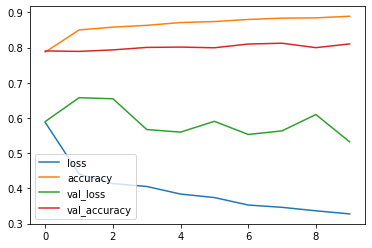

In [140]:
pd.DataFrame(model_2_history.history).plot()

LSTM model.

In [197]:
tf.random.set_seed(42)


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
x = layers.LSTM(512, return_sequences=True)(x) 
x = layers.LSTM(256, return_sequences=True)(x) 
x = layers.LSTM(128, return_sequences=True)(x)  # 
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(5, activation="softmax")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")
model_3.summary()

model_3.compile(loss= tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']
                )

(None, 55, 128)
(None, 64)
Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 55)               0         
 ectorization)                                                   
                                                                 
 token_embedding (Embedding)  (None, 55, 128)          8299648   
                                                                 
 lstm_31 (LSTM)              (None, 55, 512)           1312768   
                                                                 
 lstm_32 (LSTM)              (None, 55, 256)           787456    
                                                                 
 lstm_33 (LSTM)              (None, 55, 128)           197120    
                           

In [198]:
model_3_history = model_3.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=10,
                              validation_data= valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))
                              
                              )

Epoch 1/10
562/562 [==============================] - 55s 68ms/step - loss: 0.8023 - accuracy: 0.6937 - val_loss: 0.7161 - val_accuracy: 0.7350
Epoch 2/10
562/562 [==============================] - 29s 51ms/step - loss: 0.6236 - accuracy: 0.7669 - val_loss: 0.6177 - val_accuracy: 0.7713
Epoch 3/10
562/562 [==============================] - 25s 44ms/step - loss: 0.5703 - accuracy: 0.7928 - val_loss: 0.6093 - val_accuracy: 0.7766
Epoch 4/10
562/562 [==============================] - 24s 43ms/step - loss: 0.5475 - accuracy: 0.8033 - val_loss: 0.5693 - val_accuracy: 0.7929
Epoch 5/10
562/562 [==============================] - 26s 46ms/step - loss: 0.5254 - accuracy: 0.8069 - val_loss: 0.5340 - val_accuracy: 0.7985
Epoch 6/10
562/562 [==============================] - 23s 41ms/step - loss: 0.5048 - accuracy: 0.8158 - val_loss: 0.5212 - val_accuracy: 0.8092
Epoch 7/10
562/562 [==============================] - 23s 42ms/step - loss: 0.4943 - accuracy: 0.8212 - val_loss: 0.4994 - val_accuracy:

In [199]:
model_3_eval = model_3.evaluate(valid_dataset)
model_3_eval

945/945 [==============================] - 12s 13ms/step - loss: 0.4973 - accuracy: 0.8154


[0.49729129672050476, 0.8154375553131104]

In [160]:
pd.DataFrame(model_3_history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.428906,0.387678,1.437684,0.339428
1,1.054505,0.575289,0.829750,0.677194
2,0.828626,0.680772,0.781108,0.695146
3,0.823812,0.685776,0.858979,0.667553
4,0.861633,0.670207,0.759367,0.711769
5,0.783522,0.696341,0.757307,0.703457
6,0.790378,0.696230,0.762747,0.713431
7,0.781167,0.701068,0.751024,0.710439
8,0.785927,0.696619,0.762029,0.706782
9,0.782662,0.697453,0.758564,0.705120


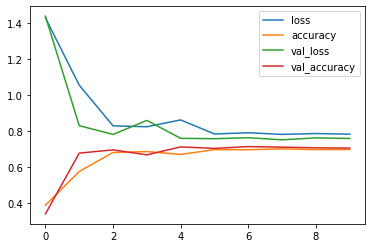

In [161]:
pd.DataFrame(model_3_history.history).plot()

In [175]:
import tensorflow_hub as hub


Transfer learning to use pretrined model.

In [179]:

embed = hub.load("https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1")
tf_hub_embedding_layer = hub.KerasLayer(embed,
                                        trainable=False,
                                        name="tf2_nnlm")

In [191]:
tf.random.set_seed(42)


# Create LSTM model
inputs = layers.Input(shape=[], dtype="string")
pretrained_embedding  = tf_hub_embedding_layer(inputs)
x = layers.Dense(128, activation="relu")(pretrained_embedding) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(5, activation="softmax")(x)
model_4 = tf.keras.Model(inputs, outputs)
model_4.summary()

model_4.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics = ['accuracy']
                )

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None,)]                 0         
                                                                 
 tf2_nnlm (KerasLayer)       (None, 128)               124642688 
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 5)                 645       
                                                                 
Total params: 124,659,845
Trainable params: 17,157
Non-trainable params: 124,642,688
_________________________________________________________________


In [192]:
model_4_history = model_4.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=10,
                              validation_data= valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset)),
                              
                              
                              )

Epoch 1/10
562/562 [==============================] - 3s 4ms/step - loss: 0.7880 - accuracy: 0.6926 - val_loss: 0.7228 - val_accuracy: 0.7251
Epoch 2/10
562/562 [==============================] - 2s 4ms/step - loss: 0.7025 - accuracy: 0.7308 - val_loss: 0.6718 - val_accuracy: 0.7417
Epoch 3/10
562/562 [==============================] - 2s 4ms/step - loss: 0.6796 - accuracy: 0.7465 - val_loss: 0.6801 - val_accuracy: 0.7370
Epoch 4/10
562/562 [==============================] - 4s 6ms/step - loss: 0.6862 - accuracy: 0.7379 - val_loss: 0.6570 - val_accuracy: 0.7626
Epoch 5/10
562/562 [==============================] - 4s 6ms/step - loss: 0.6698 - accuracy: 0.7442 - val_loss: 0.6445 - val_accuracy: 0.7626
Epoch 6/10
562/562 [==============================] - 4s 7ms/step - loss: 0.6595 - accuracy: 0.7506 - val_loss: 0.6262 - val_accuracy: 0.7620
Epoch 7/10
562/562 [==============================] - 3s 6ms/step - loss: 0.6472 - accuracy: 0.7581 - val_loss: 0.6259 - val_accuracy: 0.7706
Epoch 

In [196]:
model_4_eval = model_4.evaluate(valid_dataset)
model_4_eval

945/945 [==============================] - 3s 3ms/step - loss: 0.6286 - accuracy: 0.7661


[0.6286312341690063, 0.7661194205284119]

one more pretrained model.

In [188]:
embed_1 = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
tf_hub_embedding_layer_1 = hub.KerasLayer(embed_1,
                                        trainable=False,
                                        name="tf2_nnlm")

In [189]:
tf.random.set_seed(42)


# Create LSTM model
inputs = layers.Input(shape=[], dtype="string")
pretrained_embedding  = tf_hub_embedding_layer_1(inputs)
x = layers.Dense(128, activation="relu")(pretrained_embedding) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(5, activation="softmax")(x)
model_5 = tf.keras.Model(inputs, outputs)
model_5.summary()

model_5.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics = ['accuracy']
                )

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None,)]                 0         
                                                                 
 tf2_nnlm (KerasLayer)       (None, 512)               256797824 
                                                                 
 dense_19 (Dense)            (None, 128)               65664     
                                                                 
 dense_20 (Dense)            (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [190]:
model_5_history = model_5.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=10,
                              validation_data= valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset)),
                              
                              
                              )

Epoch 1/10
562/562 [==============================] - 13s 13ms/step - loss: 0.8033 - accuracy: 0.6851 - val_loss: 0.7488 - val_accuracy: 0.7221
Epoch 2/10
562/562 [==============================] - 7s 13ms/step - loss: 0.7095 - accuracy: 0.7245 - val_loss: 0.6996 - val_accuracy: 0.7390
Epoch 3/10
562/562 [==============================] - 7s 13ms/step - loss: 0.6969 - accuracy: 0.7329 - val_loss: 0.6936 - val_accuracy: 0.7374
Epoch 4/10
562/562 [==============================] - 7s 13ms/step - loss: 0.6993 - accuracy: 0.7329 - val_loss: 0.6912 - val_accuracy: 0.7370
Epoch 5/10
562/562 [==============================] - 7s 13ms/step - loss: 0.6844 - accuracy: 0.7353 - val_loss: 0.6599 - val_accuracy: 0.7497
Epoch 6/10
562/562 [==============================] - 7s 13ms/step - loss: 0.6765 - accuracy: 0.7399 - val_loss: 0.6698 - val_accuracy: 0.7460
Epoch 7/10
562/562 [==============================] - 7s 13ms/step - loss: 0.6704 - accuracy: 0.7412 - val_loss: 0.6740 - val_accuracy: 0.745

In [195]:

model_5_eval = model_5.evaluate(valid_dataset)
model_5_eval

945/945 [==============================] - 10s 11ms/step - loss: 0.6492 - accuracy: 0.7557


[0.6492414474487305, 0.7556599974632263]

In [210]:
model_validation = pd.DataFrame({'model_0': model_0_eval,
    'model_1': model_1_eval,
    'model_2': model_2_eval,
    'model_3': model_3_eval,
    'model_4': model_4_eval,
    'model_5': model_5_eval})
model_evaluation = model_validation.transpose()

#### compare the accuracy of all models.


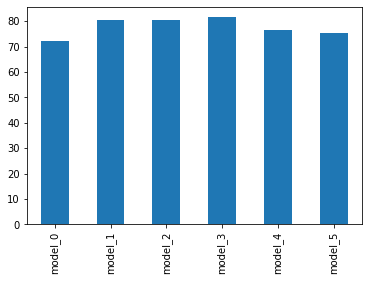

In [224]:
import matplotlib.pyplot as plt

(model_evaluation[1] *100).plot(kind= 'bar')

### The work is still in progress.
in the next stage, we are going to use character embedding to increase the accuracy of the models.